<h1 style=\"text-align: center; font-size: 50px;\">🌷 Iris flowers classification with LDA and SVM </h1>
This notebook is about Iris Flowers: a famous machine learning classification problem. <br>
The goal is to create a model that classifies the categorical variable (setosa, virginica or versicolor) based in some probability.

## Notebook Overview
- Imports
- Configurations
- Loading the dataset
- Summarize the Dataset 
- Data Visualization 
- Model Building and Evaluation


## Imports

In [4]:
# ------------------------ Data Manipulation ------------------------
import numpy as np
import pandas as pd

# ------------------------ Visualization Libraries ------------------------ 
import seaborn as sns 
sns.set_palette('husl') 
import matplotlib.pyplot as plt
%matplotlib inline

# ------------------------ System Utilities ------------------------
import warnings
import logging
import time

# ------------------------ Machine Learning tools ------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Configurations

In [6]:
# Suppress Python warnings
warnings.filterwarnings("ignore")

In [7]:
# Create logger
logger = logging.getLogger("flower_logger")
logger.setLevel(logging.INFO)
logger.propagate = False
logger.handlers.clear()

formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s", 
                              datefmt="%Y-%m-%d %H:%M:%S")  

stream_handler = logging.StreamHandler()
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)




In [8]:
# ------------------------- Paths -------------------------
DATASET_URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
MODEL_DIR = "../model/Iris_model.joblib"

# ------------------------ MLflow Integration ------------------------
EXPERIMENT_NAME = "Iris_Flower_Experiment"
RUN_NAME = "Iris_Flower_Run"
MODEL_NAME = "Iris_Flower_Model"

In [9]:
start_time = time.time() 
logger.info('Notebook execution started.')

2025-07-06 14:31:44 - INFO - Notebook execution started.


# Loading the dataset
First of all we will import some libraries for analysis and model building:

In [11]:
dataset_url = DATASET_URL
col_name = ["sepal-length", "sepal-width", "petal-length","petal-width","class"]

# Reading the .csv file
dataset = pd.read_csv(dataset_url, names = col_name)

# Summarize the Dataset 

## Dataset overview

Dataset contains the data for this project in comma-separated values (CSV) format. The number of columns is 5, and the number of rows is 150.

In [15]:
print("Dataset shape:", dataset.shape, " => 150 rows and 5 columns \n")
dataset.head(67) # The head() function is used to get the first n rows. By default: n = 5

Dataset shape: (150, 5)  => 150 rows and 5 columns 



,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
62,6.0,2.2,4.0,1.0,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor


***So, in dataset representation above what exactly are the features (vector $X \in \mathbb{R^ {n_x \times m}}$) of this Iris Machine Learning Classification problem? Well, the features are those sepal and petal lenght and width..***

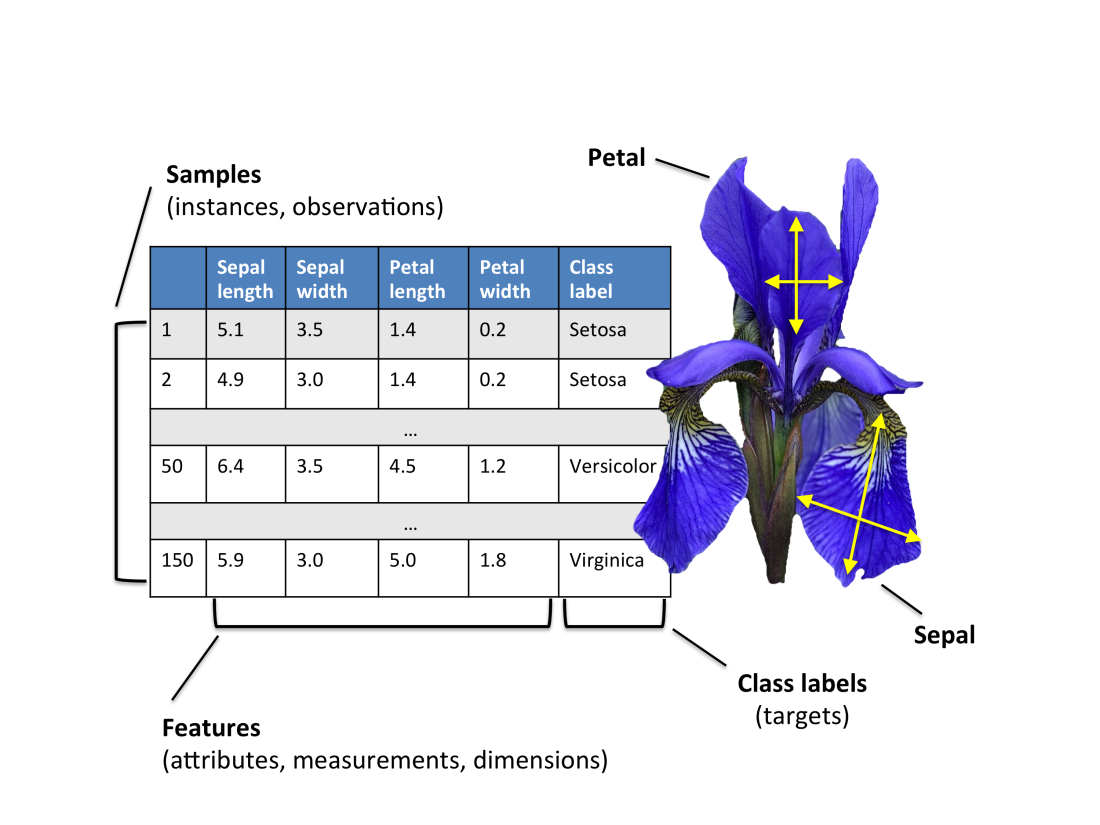

In [17]:
# used to print a concise summary of a DataFrame. 
# This method prints information about a DataFrame 
# including the index dtype and column dtypes, non-null values and memory usage.
dataset.info(verbose=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Columns: 5 entries, sepal-length to class
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# Descriptive statistics: this method returns many scatter metrics: std, count, min, max, percentil ... 
# Where each colum (iri's class) has it's respective computation done 
dataset.describe() 

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
dataset.groupby("class")

We can see all classes, but this unorganized output does not mean much

In [21]:
dataset.groupby(dataset["class"])

In [22]:
dataset["class"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

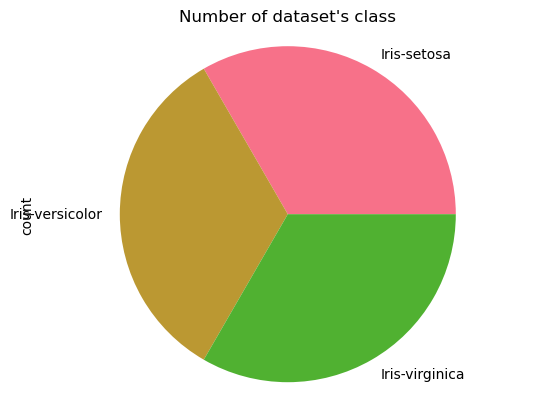

In [23]:
dataset['class'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title("Number of dataset's class")
plt.show()

# Data Visualization 

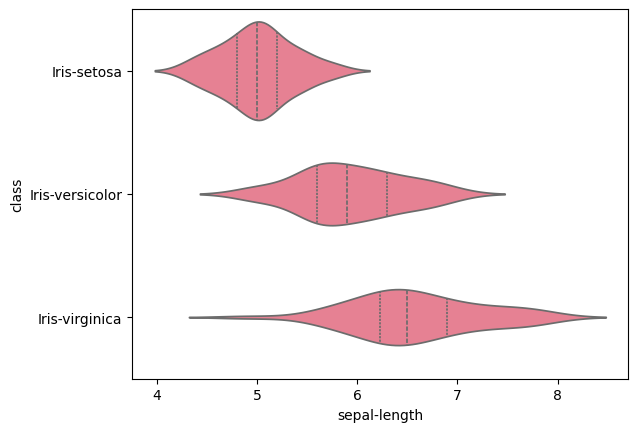

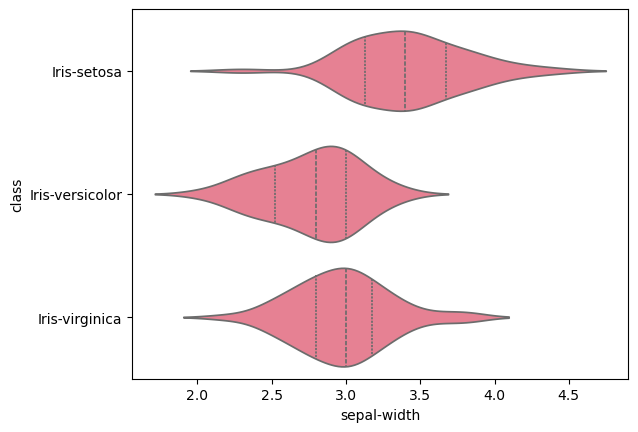

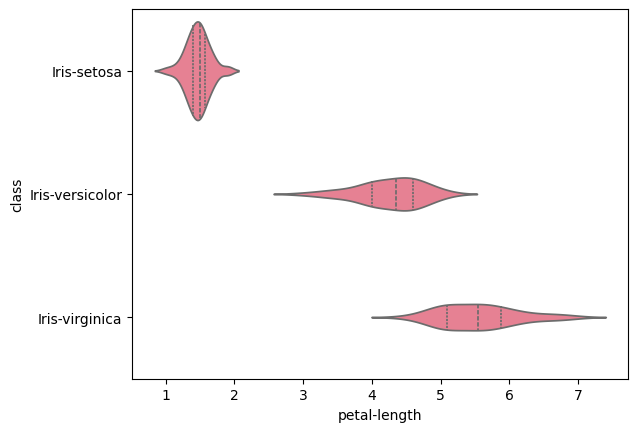

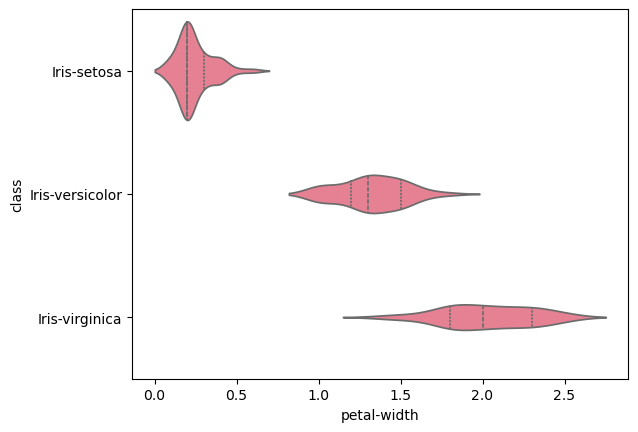

In [25]:
sns.violinplot(y='class', x="sepal-length", data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x="sepal-width", data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x="petal-length", data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x="petal-width", data=dataset, inner='quartile')
plt.show()

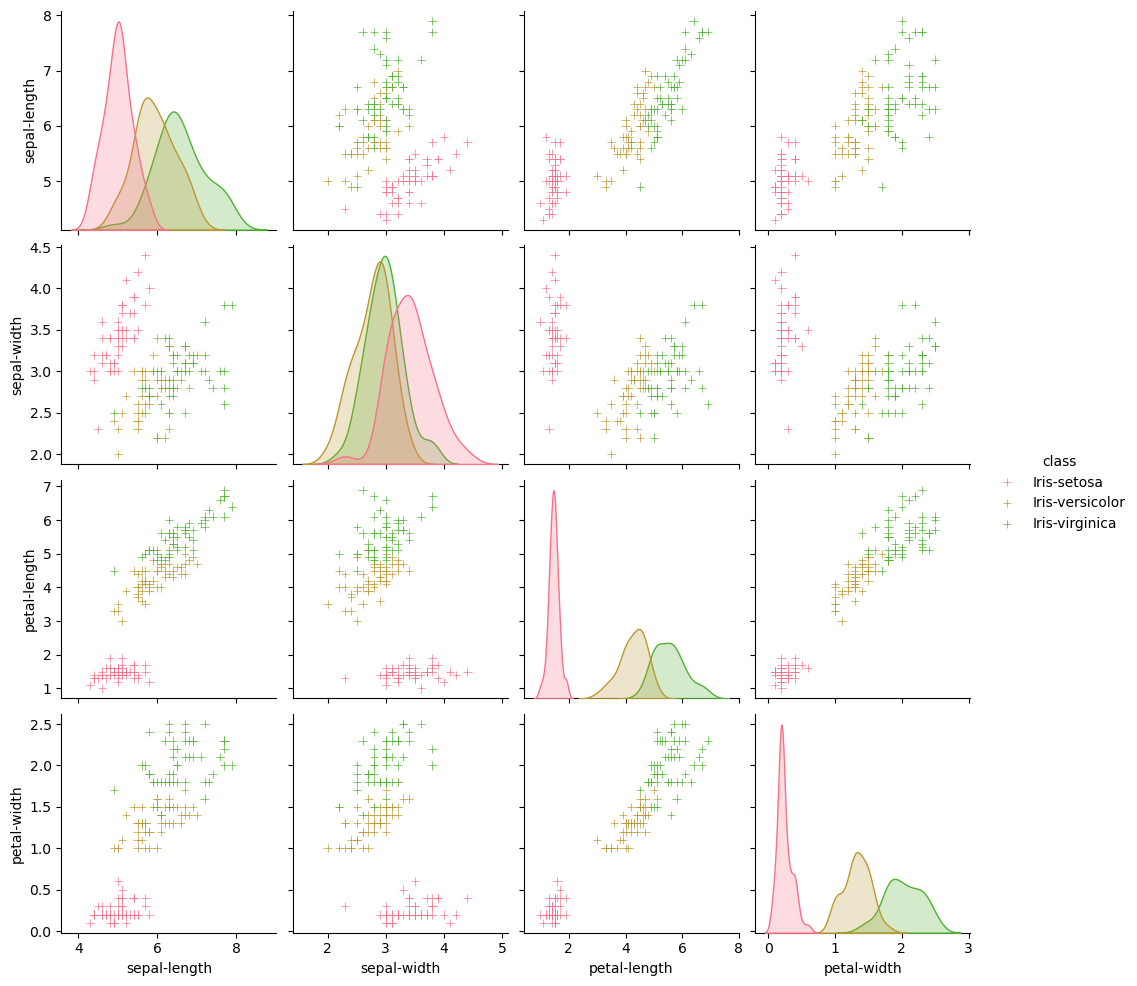

In [26]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

In [27]:
dataset['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

From the above, we can see that Iris-Setosa is separated from both other species in all the features.

**Heat map overview: definition and examples in numpy** <br>
**heat map (ou mapa de calor) is a visualization technique where it is able to show the correlation among variables through intensity of colors.** 

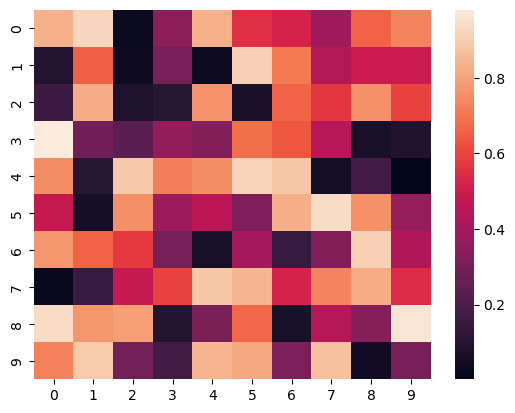

In [30]:
myarray = np.random.rand(10,10)
sns.heatmap(myarray)
plt.show()

In the example above we can see that random.rand in creation of np array is definitely random because no array value is super/sub(estimate), they occur equally

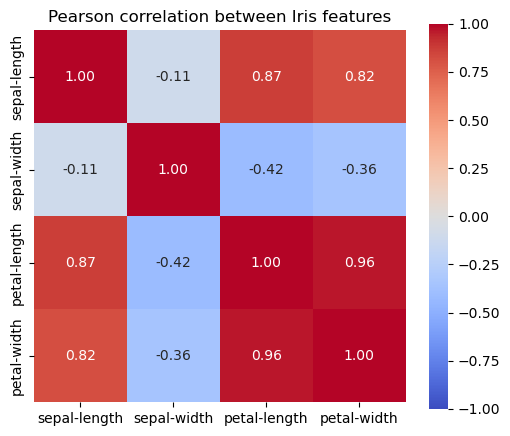

In [32]:
feature_cols = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
corr_matrix  = dataset[feature_cols].corr(method="pearson") 

plt.figure(figsize=(6, 5))               # optional: bigger canvas
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           
    cmap="coolwarm",     
    vmin=-1, vmax=1,     
    square=True
)
plt.title("Pearson correlation between Iris features")
plt.show()

The above heatmap showsthe correlation between the different features in the Iris flowers dataset, the values and colors show how highly the 
features are correlated. 

# Model Building

In [35]:
x = dataset.drop(['class'], axis=1)
y = dataset['class']
logger.info(f'x shape: {x.shape} | y shape: {y.shape} ')

2025-07-06 14:31:50 - INFO - x shape: (150, 4) | y shape: (150,) 


***about axis in pandas: <br>***
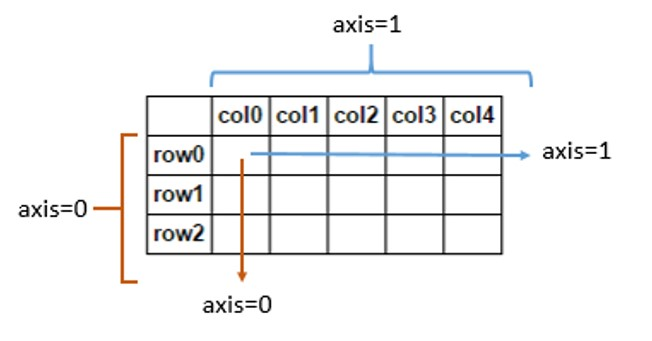

In [37]:
x

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

### Train and Test Split 4.1.2

Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:

x and y has 120 length (150 * 80%) because 80% of entire dataset I designed to train part

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [43]:
x_train

,sepal-length,sepal-width,petal-length,petal-width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [44]:
y_train

91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
            ...       
133     Iris-virginica
137     Iris-virginica
72     Iris-versicolor
140     Iris-virginica
37         Iris-setosa
Name: class, Length: 120, dtype: object

In [45]:
x_test

,sepal-length,sepal-width,petal-length,petal-width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [46]:
y_test

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
56     Iris-versicolor
141     Iris-virginica
44         Iris-setosa
29         Iris-setosa
120     Iris-virginica
94     Iris-versicolor
5          Iris-setosa
102     Iris-virginica
51     Iris-versicolor
78     Iris-versicolor
42         Iris-setosa
92     Iris-versicolor
66     Iris-versicolor
31         Iris-setosa
35         Iris-setosa
90     Iris-versicolor
84     Iris-versicolor
77     Iris-versicolor
40         Iris-setosa
125     Iris-virginica
99     Iris-versicolor
33         Iris-setosa
19         Iris-setosa
73     Iris-versicolor
146     Iris-virginica
Name: class, dtype: object

## Feature Scaling 4.1.3
As we did the exploratory data analysis and visualisation, we saw that the data has different ranges, as well as maximum and minimum values. Feedling this data into the algorithms the way it is will cause the features that have higher values to have more effect on the algorithms. We therefore use a the StandScaler that we imported which puts all the values in the same range with a mean of 0 and a standard deviation of 1

In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

## Model Creation 4.2


We don’t know which algorithms would be best for this problem.
Let’s check each algorithm in loop and print its accuracy, so that we can select our best algorithm.
**Let’s test 6 different algorithms:**
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM)

Remeber those sklearn imports? In the following snippet were are going to invoke those ML algorithms to check which is better to train our model

In [52]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

We are going to first train these models with their default parameters and see the accuracy vaules

In [54]:

# evaluate each model in turn
results = []
model_names = []
for name, model in models:
  cv_results = cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  logger.info('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

2025-07-06 14:31:51 - INFO - LR: 0.966667 (0.040825)
2025-07-06 14:31:51 - INFO - LDA: 0.975000 (0.038188)
2025-07-06 14:31:51 - INFO - KNN: 0.950000 (0.055277)
2025-07-06 14:31:51 - INFO - CART: 0.933333 (0.050000)
2025-07-06 14:31:51 - INFO - NB: 0.950000 (0.055277)
2025-07-06 14:31:51 - INFO - SVC: 0.958333 (0.041667)


Based on above output so far the LinearDiscriminantAnalysis (**LDA**) is performing better than other algorithms: <br>
LR: 0.966667 (0.040825) <br>
**LDA: 0.975000 (0.038188)**<br>
KNN: 0.950000 (0.055277)<br>
CART: 0.941667 (0.038188)<br>
NB: 0.950000 (0.055277)<br>
SVC: 0.958333 (0.041667)


Let’s now go to apply a technique called GridSearchCV that tries the different algorihms with different sets of hyperparameters to see if this improves our accuracy. However using GridSeearch can increase training time due to the many training iterations of different conmbinations of hyperparamters.

In [56]:
param_dist = {
    "LR":  {
                "C": np.logspace(-3,3,30),
                "solver": ["lbfgs","liblinear"],
                "max_iter": [100, 200, 500, 1000, 2000]
                
            },
    
    "LDA": {
                "solver": ["svd","lsqr","eigen"]
            },
    
    "KNN": {
                "n_neighbors": range(1,31), 
                "weights": ["uniform","distance"]
            },
    "CART":{
                "criterion":["gini","entropy","log_loss"],
                "max_depth":[None,*range(1,11)],
                "min_samples_split":[2,4,6,8,10]
            },
    "NB":  {},
                    # nothing to tune
    "SVC": {
                "C": np.logspace(-2,2,25),
                "kernel":["rbf","poly","sigmoid"],
                "gamma":["scale","auto"]
            }
}

In [57]:
best_models = {}
logger.info("----- RandomizedSearchCV -----")


for name, base_est in models:
    if not param_dist[name]:               # GaussianNB: empty search space
        base_est.fit(x_train_scaled, y_train)
        best_models[name] = base_est
        logger.info("%s fitted with defaults (no hyper-params).", name)
        continue

    search = RandomizedSearchCV(
        estimator       = base_est,
        param_distributions = param_dist[name],
        n_iter          = 40,
        cv              = kfold,
        scoring         = "accuracy",
        random_state    = 1,
        n_jobs          = -1
    )
    search.fit(x_train_scaled, y_train)
    best_models[name] = search.best_estimator_
    logger.info("%s | best GridSearchCV acc: %.3f | best params: %s",
                name, search.best_score_, search.best_params_)

2025-07-06 14:31:51 - INFO - ----- RandomizedSearchCV -----
2025-07-06 14:31:55 - INFO - LR | best GridSearchCV acc: 0.975 | best params: {'solver': 'lbfgs', 'max_iter': 1000, 'C': 3.2903445623126677}
2025-07-06 14:31:55 - INFO - LDA | best GridSearchCV acc: 0.975 | best params: {'solver': 'svd'}
2025-07-06 14:31:55 - INFO - KNN | best GridSearchCV acc: 0.967 | best params: {'weights': 'uniform', 'n_neighbors': 6}
2025-07-06 14:31:56 - INFO - CART | best GridSearchCV acc: 0.967 | best params: {'min_samples_split': 10, 'max_depth': 8, 'criterion': 'gini'}
2025-07-06 14:31:56 - INFO - NB fitted with defaults (no hyper-params).
2025-07-06 14:31:56 - INFO - SVC | best GridSearchCV acc: 0.975 | best params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 6.812920690579608}


We now have the best parameter combinations for each algorithm with the best accuracy having Logistic Regression(LR), LinearDiscriminantAnalysis(LDA) and Support Vector Classifier(SVC)<br>

LR | best GridSearchCV acc: 0.975 | best params: {'solver': 'lbfgs', 'max_iter': 1000, 'C': 3.2903445623126677}<br>
LDA | best GridSearchCV acc: 0.975 | best params: {'solver': 'svd'}<br>
KNN | best GridSearchCV acc: 0.967 | best params: {'weights': 'uniform', 'n_neighbors': 6}<br>
CART | best GridSearchCV acc: 0.967 | best params: {'min_samples_split': 10, 'max_depth': 8, 'criterion': 'gini'}<br>
NB fitted with defaults (no hyper-params)<br>
SVC | best GridSearchCV acc: 0.975 | best params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 6.812920690579608}<br>

We are now going to test all the 3 best models against the test data to ascertain the best accuracy.

In [60]:
best_models = {
    "LR": LogisticRegression(solver="lbfgs", max_iter=1000, C=3.2903445623126677),
    "LDA": LinearDiscriminantAnalysis(solver="svd"),
    "SVC": SVC(kernel="rbf", gamma="scale", C=6.812920690579608),
}

scores = {}
for name, model in best_models.items():
    model.fit(x_train_scaled, y_train)
    scores[name] = accuracy_score(y_test, model.predict(x_test_scaled))
    logger.info("%s : %.3f",name, scores[name])

2025-07-06 14:31:56 - INFO - LR : 0.967
2025-07-06 14:31:56 - INFO - LDA : 1.000
2025-07-06 14:31:56 - INFO - SVC : 0.967


The Linear Discriminant Algorithm proves to have the best accuracy of 100% even on test data.

## Model Creation 4.3



We try the Support Vector Classifier first.

In [64]:
model = SVC(kernel="rbf", gamma="scale", C=6.812920690579608)
model.fit(x_train_scaled,y_train)

SVC(C=6.812920690579608)

In [65]:
prediction = model.predict(x_test_scaled)

acc_test = accuracy_score(y_test, prediction)
logger.info(f'Test Accuracy: {acc_test}')
logger.info(f'Classification Report: \n {classification_report(y_test, prediction)}')

2025-07-06 14:31:56 - INFO - Test Accuracy: 0.9666666666666667
2025-07-06 14:31:56 - INFO - Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



And we finally try the Linear Discriminant Analysis model

In [67]:
model = LinearDiscriminantAnalysis(solver="svd")
model.fit(x_train_scaled,y_train)

LinearDiscriminantAnalysis()

In [68]:
model.coef_

array([[  8.0612466 ,   4.28697633, -35.33618038, -13.66321204],
       [ -1.2993795 ,  -1.60981942,   7.52969039,   1.46109555],
       [ -6.05253581,  -2.44610814,  24.98892023,  10.88192578]])

In [69]:
y_train.shape

(120,)

In [70]:
model.intercept_

array([-30.78050617,  -2.61635434, -16.52546581])

In [71]:
x_train

,sepal-length,sepal-width,petal-length,petal-width
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


When passing new data for prediction to the model we have to make sure we turn that data into a numpy array and transform that data using the same scaler we used on the training data.

In [73]:
data = np.array([[3, 2, 4, 0.2]])
data_scaled = scaler.transform(data)
model.predict(data_scaled)

array(['Iris-versicolor'], dtype='<U15')

### Measurement model
Data scientists deal with metrics everyday in terms of model evaluation. 
<br>
As show above, one must measure the performance of a model and determine **"how wrong is this"?** in terms of: <br> 
1. Accuracy <br>
2. Precision:  <br>
3. mAP <br>
4. Recall <br>
5. F1-score <br>

### Accuracy 
This metrics generally describes how the model performs across all classes. **It is useful when all classes are of equal importance.** Accuracy does not work in imbalanced datasets, yeah, it's the achilles' heel of accuracy. <br> 
**Example:** If the model made a total of 530/550 correct predictions for the Positive class, compared to just 5/50 for the Negative class, then the total accuracy is (530 + 5) / 600 = 0.8917. This means the model is 89.17% accurate. With that in mind, you might think that for any sample (regardless of its class) the model is likely to make a correct prediction 89.17% of the time. This is not valid, especially when you consider the Negative class for which the model performed badly. 

$Accuracy = \frac{True_{positive}+True_{negative}}{True_{positive}+True_{negative}+False_{positive}+False_{negative}}$


In [76]:
prediction = model.predict(x_test_scaled)

acc_test = accuracy_score(y_test, prediction)
logger.info(f'Test Accuracy: {acc_test}')
logger.info(f'Classification Report: \n {classification_report(y_test, prediction)}')

2025-07-06 14:31:56 - INFO - Test Accuracy: 1.0
2025-07-06 14:31:56 - INFO - Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [77]:
end_time: float = time.time()
elapsed_time: float = end_time - start_time
elapsed_minutes: int = int(elapsed_time // 60)
elapsed_seconds: float = elapsed_time % 60
logger.info(f"Total execution time: {elapsed_minutes}m {elapsed_seconds:.2f}s")
logger.info("Notebook execution completed successfully.")


2025-07-06 14:31:56 - INFO - Total execution time: 0m 12.80s
2025-07-06 14:31:56 - INFO - Notebook execution completed successfully.


Built with ❤️ using [**HP AI Studio**](https://hp.com/ai-studio).